#**Tidy Data: Data Cleaning and Visualization**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Finding the path to my file in Google Drive
file_path = '/content/drive/MyDrive/olympics_08_medalists.csv'

df = pd.read_csv(file_path)

##**Data Cleaning & Tidy Process:**
*Here I followed these assignment components*

Demonstrate how you reshape or transform the dataset so that:
* Each variable is in its own column.
* Each observation forms its own row.
* Each type of observational unit forms its own table.

In [5]:
# Melt the dataset into long format
df_melted = df.melt(id_vars=["medalist_name"], var_name="event", value_name="medal")

# Remove rows where the medal column is empty (""), since they don't contain any medal information and don't provide any observations.
# This way each observation has its own row.
df_melted = df_melted[df_melted['medal'] != ""]

# Split the event column into the event type (male/female) and the specific sport (archery, athletics)
# This way each variable has it's own column.
# For example, "male_archery" -> "male" and "archery": Gender and event
df_melted[['gender', 'event_type']] = df_melted['event'].str.split('_', expand=True)

# Drop the original 'event' column if needed and view the final cleaned DataFrame
df_melted = df_melted.drop(columns=["event"])

# Reorder columns for readability
df_melted = df_melted[['medalist_name', 'gender', 'event_type', 'medal']]

# Final cleaned DataFrame
print(df_melted)

#but wait, there is a lot of NaN values in medals!

            medalist_name gender             event_type medal
0         Aaron Armstrong   male                archery   NaN
1           Aaron Peirsol   male                archery   NaN
2        Abdullo Tangriev   male                archery   NaN
3       Abeer Abdelrahman   male                archery   NaN
4                 Abhinav   male                archery   NaN
...                   ...    ...                    ...   ...
131245        Éver Banega   male  greco-roman wrestling   NaN
131246  Ólafur Stefánsson   male  greco-roman wrestling   NaN
131247      Óscar Brayson   male  greco-roman wrestling   NaN
131248   Łukasz Pawłowski   male  greco-roman wrestling   NaN
131249        Živko Gocić   male  greco-roman wrestling   NaN

[131250 rows x 4 columns]


This looks much more organized,
*but wait, there is a lot of NaN values in medals!*

Let's fix this.

In [8]:

# Drop rows with NaN values in the 'medal' column
df_melted = df_melted.dropna(subset=['medal'])

# Final cleaned DataFrame
print(df_melted)


              medalist_name gender             event_type   medal
177            Bair Badënov   male                archery  bronze
676           Ilario Di Buò   male                archery  silver
682            Im Dong-hyun   male                archery    gold
760               Jiang Lin   male                archery  bronze
920          Lee Chang-hwan   male                archery    gold
...                     ...    ...                    ...     ...
130932        Steeve Guénot   male  greco-roman wrestling    gold
131159  Yannick Szczepaniak   male  greco-roman wrestling  bronze
131162       Yavor Yanakiev   male  greco-roman wrestling  bronze
131200      Yury Patrikeyev   male  greco-roman wrestling  bronze
131234         Zoltán Fodor   male  greco-roman wrestling  silver

[1875 rows x 4 columns]


##**Visualization:**

*Here I follow this assignment piece*

* Include at least two visualizations that reflects the newly cleaned data.

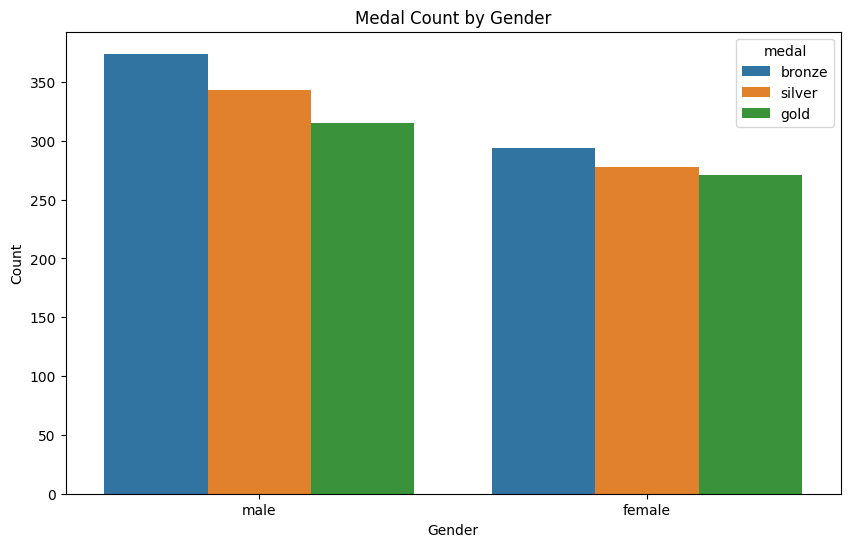

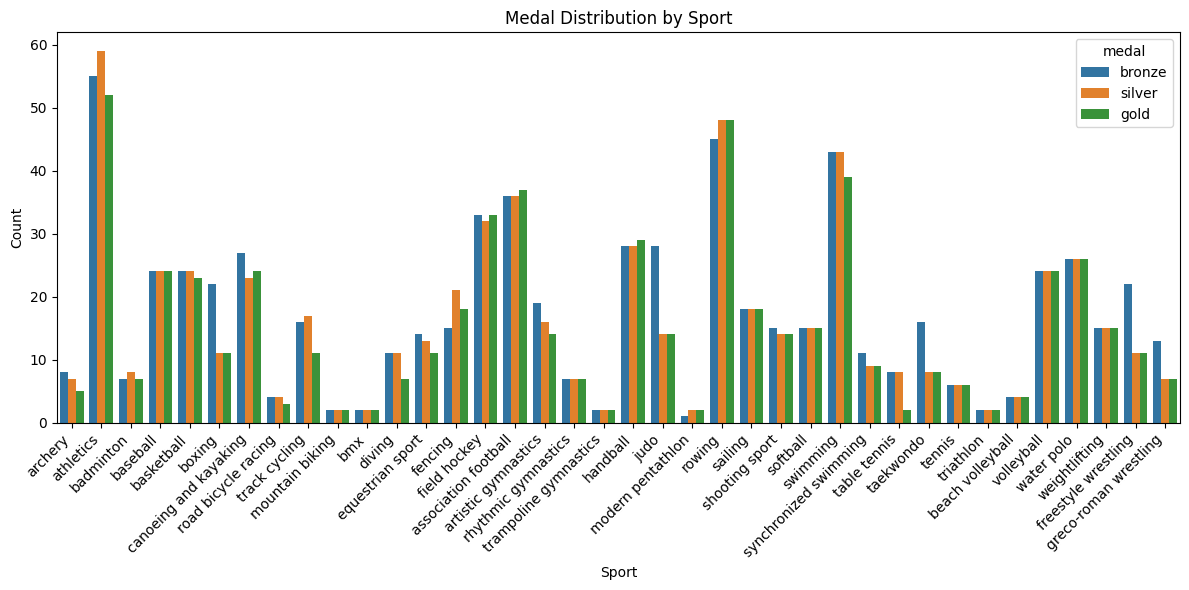

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Count of medals per gender
sns.countplot(x='gender', hue='medal', data=df_melted)
plt.title('Medal Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualization 2:  Distribution of medal types across different sports
sns.countplot(x='event_type', hue='medal', data=df_melted)
plt.title('Medal Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Visualization 1: Count of medals per gender

*Analysis:*

* Gender Difference in Participants and Medalists: More male centric medals demonstrate more male centric sports
* Uneven Medal Types: Teams that win bronze and silver must be on average slightly bigger than those who win gold because bronze and silver each have more medals, with bronze having the most.

### Visualization 2:  Distribution of medal types across different sports

*Analysis:*

* Dominant Sports: Athletics, swimming, and artistic gymnastics have the highest medal counts. These sports typically have multiple events, leading to more opportunities for medals.

* Balanced Distribution: In most sports, the distribution of gold, silver, and bronze medals is fairly balanced, though slight variations exist.

* Peak Medal Counts:

  * Athletics shows the highest count, with silver medals slightly exceeding bronze and gold.
  * Swimming and gymnastics also have high medal counts, with an almost equal spread among the three types.

* Less Represented Sports: Sports like BMX, beach volleyball, and modern pentathlon have significantly fewer medals compared to others.

##**Pivot-Table:**

*Here I follow this assignment piece*

* Run at least one aggregation function on the tidy data.

In [10]:


# Create a pivot table to count medals by gender and event type
pivot_table = pd.pivot_table(df_melted, values='medal', index='gender', columns='event_type', aggfunc='count')

pivot_table


event_type,archery,artistic gymnastics,association football,athletics,badminton,baseball,basketball,beach volleyball,bmx,boxing,...,synchronized swimming,table tennis,taekwondo,tennis,track cycling,trampoline gymnastics,triathlon,volleyball,water polo,weightlifting
gender,,,,,,,,,,,,,,,,,,,,,
female,9.0,20.0,54.0,81.0,10.0,NaN,36.0,6.0,3.0,NaN,...,29.0,9.0,16.0,9.0,9.0,3.0,3.0,36.0,39.0,21.0
male,11.0,29.0,55.0,85.0,12.0,72.0,35.0,6.0,3.0,44.0,...,NaN,9.0,16.0,9.0,35.0,3.0,3.0,36.0,39.0,24.0


### Pivot table to count medals by gender and event type

*Analysis:*
The pivot table `pivot_table` shows the count of medals for each combination of gender and event type.  The index of the table is 'gender' (male or female), and the columns represent different event types (e.g., archery, athletics, etc.).  Each cell in the table contains the number of medals won by that gender in that specific event type.  The `aggfunc='count'` argument specifies that the aggregation function used to populate the table is the count of medals.  Essentially, it provides a summary of medal counts categorized by gender and event.


##**Visualizations and Pivot Tables continued**

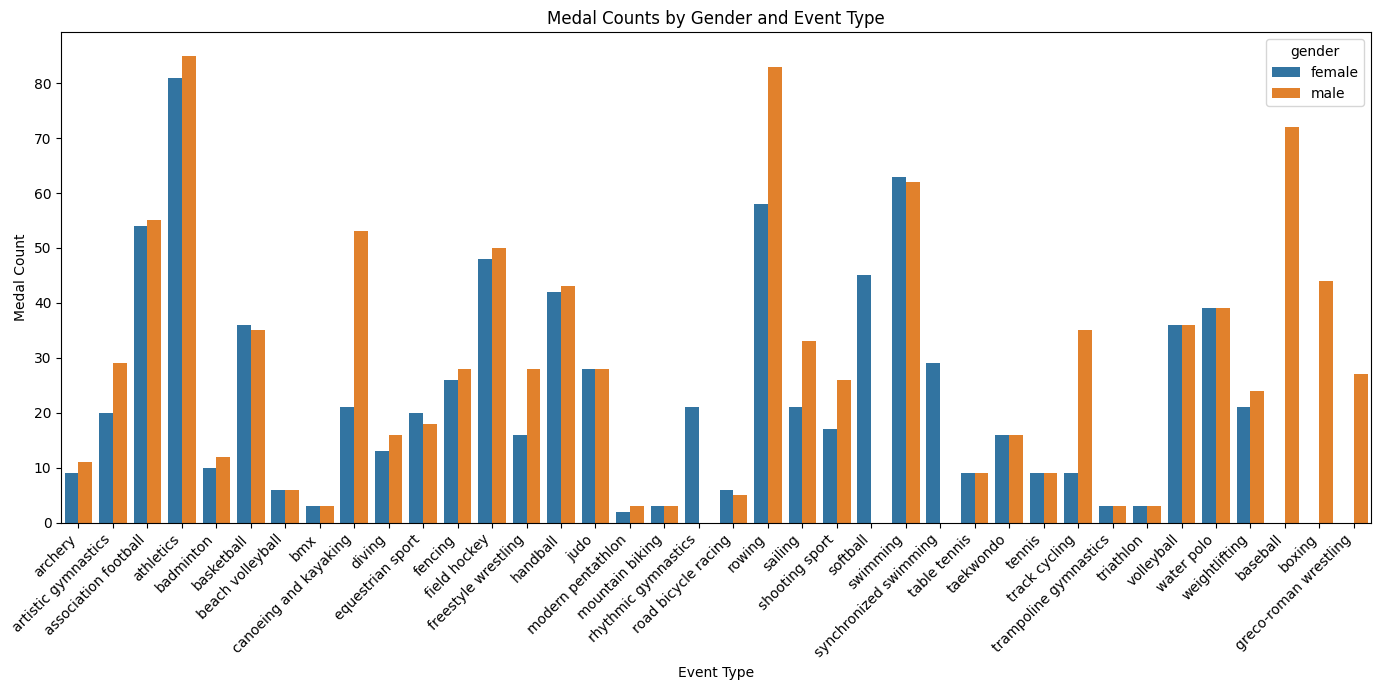

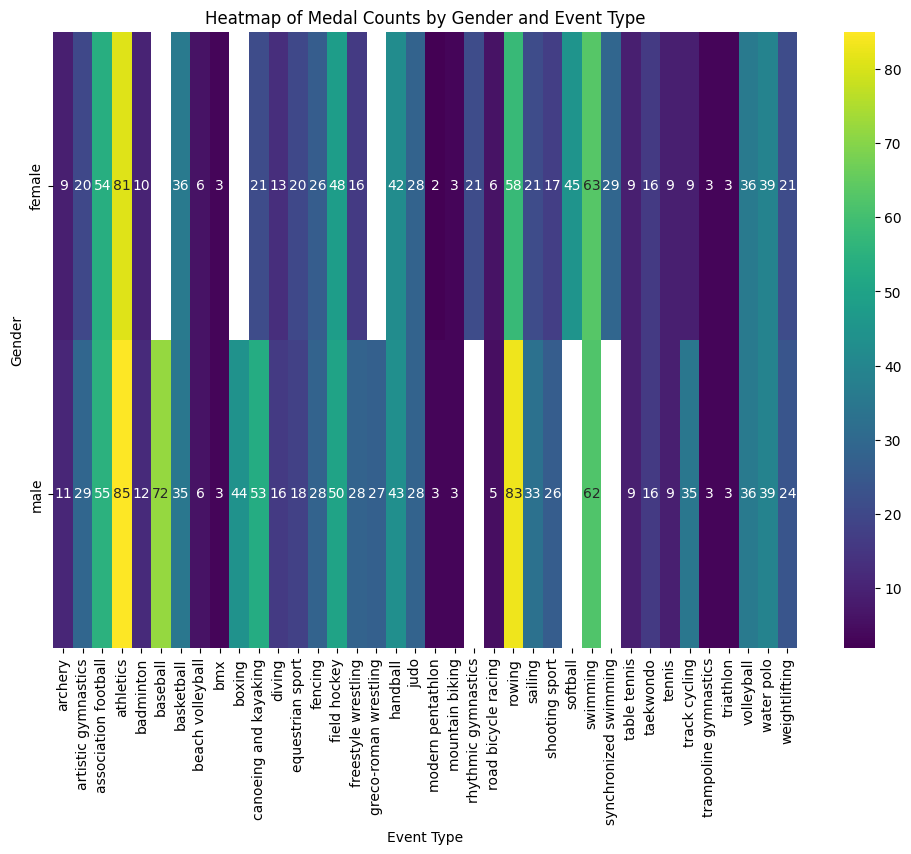

In [13]:

# Group by gender and event type, then count medals
medal_counts = df_melted.groupby(['gender', 'event_type'])['medal'].count().reset_index()

# Visualization 3:  Medal counts by gender and event type (bar plot)
sns.barplot(x='event_type', y='medal', hue='gender', data=medal_counts)
plt.title('Medal Counts by Gender and Event Type')
plt.xlabel('Event Type')
plt.ylabel('Medal Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Visualization 4: Heatmap of medal counts by gender and event type
pivot_table = medal_counts.pivot(index='gender', columns='event_type', values='medal')
# Change the format code to '.0f' to display floats as integers without decimal places
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')
plt.title('Heatmap of Medal Counts by Gender and Event Type')
plt.xlabel('Event Type')
plt.ylabel('Gender')
plt.show()


###Bar Chart (Medal Counts by Gender and Event Type)

####Gender-Based Medal Distribution:

* Males (orange bars) have a higher medal count in several events, particularly wrestling (Greco-Roman and freestyle), boxing, weightlifting, and rowing.
* Females (blue bars) have a relatively higher or equal presence in artistic gymnastics, swimming, synchronized swimming, and handball.

####Notable Sports with Close Gender Balance:

* Sports like badminton, basketball, and volleyball have nearly equal representation in terms of medals.
Events with Male Dominance:

* Baseball, Greco-Roman wrestling, and boxing have significantly higher male medal counts, likely due to historical factors or event availability.

####Events with Female Dominance:

* Rhythmic gymnastics and synchronized swimming are exclusively female-dominated events.

###Analysis of the Heatmap (Medal Counts by Gender and Event Type)

####Color Intensity Representation:

* Lighter (yellow/white) colors indicate higher medal counts, while darker colors (purple/blue) indicate lower medal counts.
* Events like athletics, swimming, and weightlifting have high medal counts for both genders.

####High Medal Counts (Bright Yellow Zones):

* Athletics and swimming show the brightest yellow zones, confirming they are major sources of medals for both genders.
* Rowing and weightlifting also show strong medal counts.

####Gender-Specific Trends:

* The Greco-Roman wrestling section is bright for males but absent or dark for females, indicating male dominance.
* Synchronized swimming and rhythmic gymnastics are exclusively bright for females, reflecting gender-specific participation.

####Low Medal Count Sports:

* Some sports like modern pentathlon, trampoline gymnastics, and BMX have fewer medals in general, as indicated by consistently darker colors.

# Conclusion:

*This notebook performed data cleaning and visualization on a dataset of Olympic medalists.*

# Key takeaways:

1. Data Transformation: The original wide-format data was successfully converted into a tidy long format, where each variable had its own column, each observation its own row, and relevant observations were retained, removing empty medal entries and NaN values.

2. Visualizations:  Visualizations like countplots and barplots helped identify trends in medal distribution by gender and sport.  Heatmaps provided a concise overview of medal counts across various sports, highlighting gender disparities and dominant sports.

3. Aggregation: Pivot tables and grouped counts provided quantitative summaries of the data, allowing further insights into medal distributions based on gender and sport.

4. Key Findings:  The analysis revealed dominant sports (athletics, swimming, gymnastics), gender disparities in some sports, and sports with more balanced participation.  The visualizations offered a clear and accessible way to understand the data, enabling a deeper understanding of the medal distribution amongst male and female participants.
